In [ ]:
# ===========================
# Investigating the Removal of Cadmium from Water through UiO-66 Derivatives using Molecular Dynamics
# =========================== 

# 📊 Heatmap Coordinates Plots
# ---------------------------
# Table of Contents
# 1️⃣ Heatmap density 
# 2️⃣ Z-direction Density Profiles
# ----------------------------

Generating heatmaps for Cd atoms with highlighted bins and annotations...
Processing file 1/4: cd100/uio66-COO/dump_uio66-COO_system_md1_stride250.lammpstrj
Start time: 2025-01-22 22:42:43.607236


/home/josephzc/.local/lib/python3.10/site-packages/MDAnalysis/topology/LAMMPSParser.py:632: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
/home/josephzc/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/LAMMPS.py:598: UserWarning: Reader has no dt information, set to 1.0 ps
  ts.data['time'] = step_num * ts.dt


Finished processing cd100/uio66-COO/dump_uio66-COO_system_md1_stride250.lammpstrj
End time: 2025-01-22 22:42:43.831070
Elapsed time: 0.22 seconds

Processing file 2/4: cd100/uio66-COO2/dump_uio66-COO2_system_md1_stride250.lammpstrj
Start time: 2025-01-22 22:42:43.838676
Finished processing cd100/uio66-COO2/dump_uio66-COO2_system_md1_stride250.lammpstrj
End time: 2025-01-22 22:42:44.045021
Elapsed time: 0.21 seconds

Processing file 3/4: cd100/uio66-COO3/dump_uio66-COO3_system_md1_stride250.lammpstrj
Start time: 2025-01-22 22:42:44.053039
Finished processing cd100/uio66-COO3/dump_uio66-COO3_system_md1_stride250.lammpstrj
End time: 2025-01-22 22:42:44.267719
Elapsed time: 0.21 seconds

Processing file 4/4: cd100/uio66-COO4/dump_uio66-COO4_system_md1_stride250.lammpstrj
Start time: 2025-01-22 22:42:44.273901
Finished processing cd100/uio66-COO4/dump_uio66-COO4_system_md1_stride250.lammpstrj
End time: 2025-01-22 22:42:44.498415
Elapsed time: 0.22 seconds

Table 1:
    mof_system coordinate

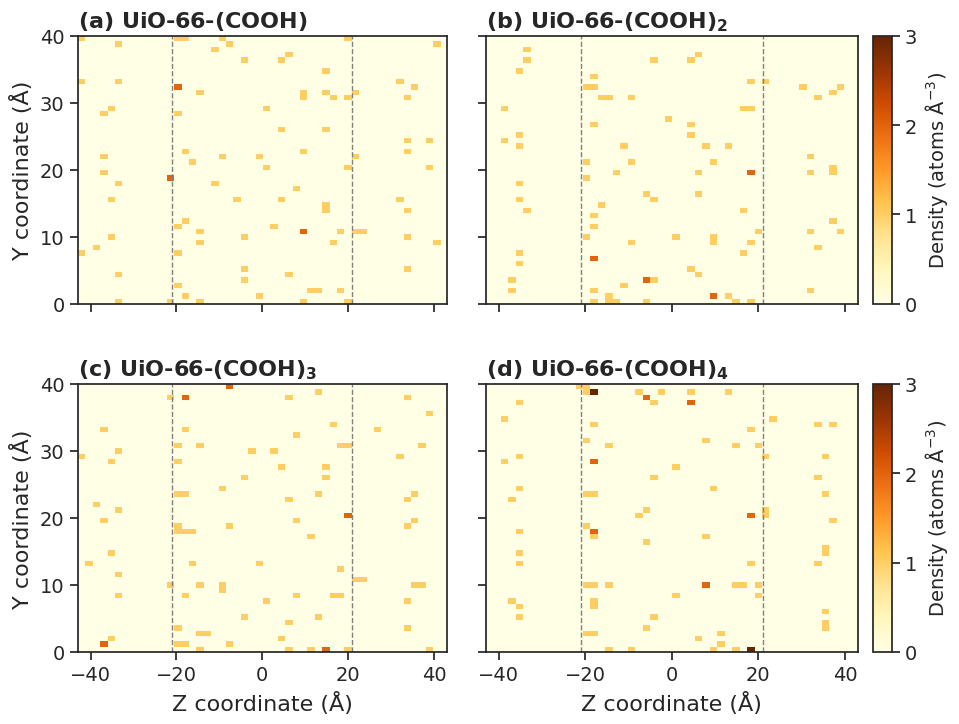

Figure saved to /home/josephzc/21Sept2024_data/0_fig/cd100_Density_Heatmaps_for_Cd_Atoms.png

Generating heatmaps for water atoms with highlighted bins and annotations...
Processing file 1/4: cd100/uio66-COO/dump_uio66-COO_system_md1_stride250.lammpstrj
Start time: 2025-01-22 22:42:45.474824


/home/josephzc/.local/lib/python3.10/site-packages/MDAnalysis/topology/LAMMPSParser.py:632: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
/home/josephzc/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/LAMMPS.py:598: UserWarning: Reader has no dt information, set to 1.0 ps
  ts.data['time'] = step_num * ts.dt


Finished processing cd100/uio66-COO/dump_uio66-COO_system_md1_stride250.lammpstrj
End time: 2025-01-22 22:42:45.677556
Elapsed time: 0.20 seconds

Processing file 2/4: cd100/uio66-COO2/dump_uio66-COO2_system_md1_stride250.lammpstrj
Start time: 2025-01-22 22:42:45.687833
Finished processing cd100/uio66-COO2/dump_uio66-COO2_system_md1_stride250.lammpstrj
End time: 2025-01-22 22:42:45.909904
Elapsed time: 0.22 seconds

Processing file 3/4: cd100/uio66-COO3/dump_uio66-COO3_system_md1_stride250.lammpstrj
Start time: 2025-01-22 22:42:45.917049
Finished processing cd100/uio66-COO3/dump_uio66-COO3_system_md1_stride250.lammpstrj
End time: 2025-01-22 22:42:46.130216
Elapsed time: 0.21 seconds

Processing file 4/4: cd100/uio66-COO4/dump_uio66-COO4_system_md1_stride250.lammpstrj
Start time: 2025-01-22 22:42:46.136545
Finished processing cd100/uio66-COO4/dump_uio66-COO4_system_md1_stride250.lammpstrj
End time: 2025-01-22 22:42:46.365556
Elapsed time: 0.23 seconds



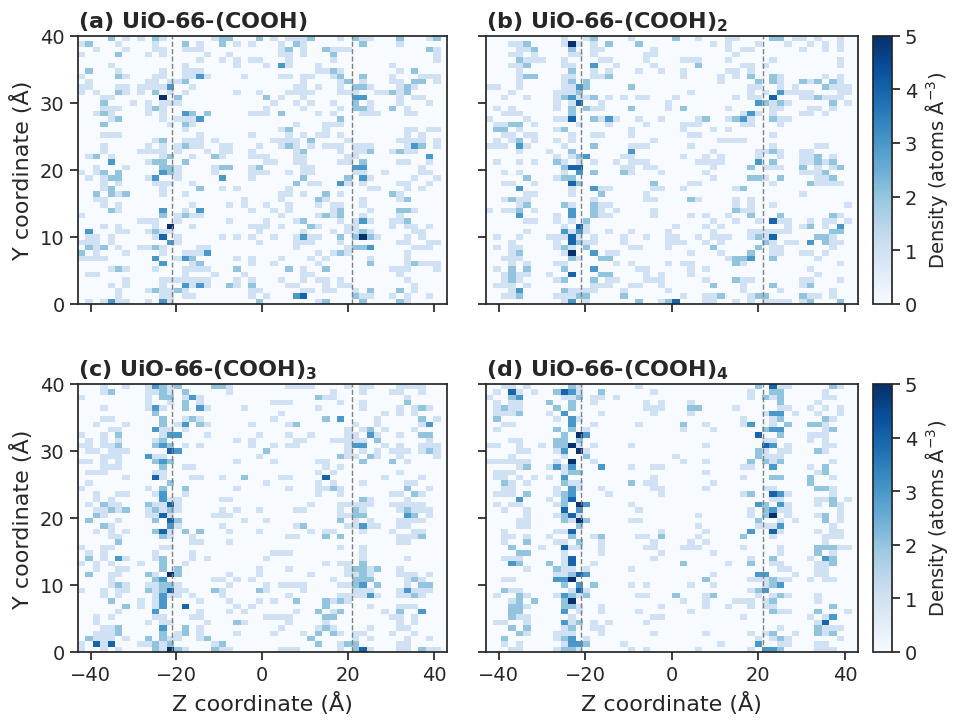

Figure saved to /home/josephzc/21Sept2024_data/0_fig/cd100_Density_Heatmaps_for_Water_Atoms.png



In [1]:
# =======================================================
# 1️⃣ Heatmap density 
# =======================================================
# For plotting files with COOH, COOH2, COOH3, COOH4
# 📅 Date Created: Oct 23, 2024
# 📅 Date Updated: Oct 23, 2024 
# - concentric circles added
# - highlight added
# - annotations added
# - true or false to turn off radial bins added
# - modified to collect and print coordinate and atom count tables
# - x-axis modified to center z=0 at MOF center

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import MDAnalysis as mda
import time
import datetime
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Circle, Wedge
import pandas as pd  # Added pandas for DataFrame handling

# File paths relative to the current directory
file_paths = [
    'cd100/uio66-COO/dump_uio66-COO_system_md1_stride250.lammpstrj',
    'cd100/uio66-COO2/dump_uio66-COO2_system_md1_stride250.lammpstrj',
    'cd100/uio66-COO3/dump_uio66-COO3_system_md1_stride250.lammpstrj',
    'cd100/uio66-COO4/dump_uio66-COO4_system_md1_stride250.lammpstrj'
]

# Labels for the subplots
#labels = ['UiO-66-COOH', 'UiO-66-COOH_2', 'UiO-66-COOH3', 'UiO-66-COOH4']
labels = [r'UiO-66-$\mathbf{(COOH)}$', 
          r'UiO-66-$\mathbf{(COOH)_2}$', 
          r'UiO-66-$\mathbf{(COOH)_3}$', 
          r'UiO-66-$\mathbf{(COOH)_4}$']

# Set up seaborn styling
sns.set(style="ticks")
# sns.set_context("talk")

# Parameters
bins = 50  # Number of bins in each dimension for the histogram

# Radial density profile variables
num_bins_radial = 20  # Number of radial bins
cutoff = 40.0  # Cutoff distance in angstroms

# Axis and colorbar settings dictionaries
y_settings = {'y_min': 0, 'y_max': 40, 'yticks': [0, 10, 20, 30, 40], 'labelpad': 5}

# Adjust x_settings to have z=0 at center
x_settings = {'x_min': -43, 'x_max': 43, 'xticks': [-40, -20, 0, 20, 40], 'labelpad': 5}

cbar_settings_cd = {'cbar_min': 0, 'cbar_max': 3, 'cbar_ticks': [0, 1, 2, 3]}
cbar_settings_water = {'cbar_min': 0, 'cbar_max': 5, 'cbar_ticks': [0, 1, 2, 3, 4, 5]}

# Variables to control subplot sizes
subplot_height = 4  # Height of each subplot in inches
num_rows = 2  # Number of rows in the subplot grid
num_cols = 2  # Number of columns in the subplot grid

# Widths for each column (in inches)
column_widths = [5, 5.5]  # Adjust these values to balance plot areas

# Editable output directory
output_dir = '/home/josephzc/21Sept2024_data/0_fig/'  # Replace with your desired output directory

# Expected Cd atom counts based on folder names
expected_cd_atom_counts = {'cd100': 100, 'cd50': 50}

# Variables to control annotations and circles
show_circles = False         # Set to False to hide circles and highlights
show_annotations = False     # Set to True to show annotations; will be ignored if show_circles is False

# Function to process and plot heatmaps
def plot_heatmaps(file_paths, labels, cmap, set_title, expected_cd_atom_counts, x_settings, y_settings, cbar_settings, collect_data=False):
    global show_annotations  # Ensure we're using the global variable
    num_files = len(file_paths)
    fig_width = sum(column_widths)
    fig_height = subplot_height * num_rows
    fig = plt.figure(figsize=(fig_width, fig_height))

    # Create GridSpec with specified width ratios
    gs = gridspec.GridSpec(num_rows, num_cols, width_ratios=column_widths)
    axes = []

    # Initialize lists to collect data for common scales
    all_heatmaps = []
    mof_centers = []

    # Initialize data structures for Tables if collect_data is True
    if collect_data:
        table1_data = []
        table2_data = []

    # Extract 'cd{number}' from the first file path for filename prefix
    first_file_path = file_paths[0]
    cd_folder = os.path.basename(os.path.dirname(os.path.dirname(first_file_path)))
    cd_number = cd_folder.lower()

    # First pass to collect data
    for idx, file_path in enumerate(file_paths):
        start_time = time.time()
        print(f"Processing file {idx+1}/{num_files}: {file_path}")
        print(f"Start time: {datetime.datetime.now()}")

        # Check if the file exists
        if not os.path.isfile(file_path):
            print(f"File not found: {file_path}")
            all_heatmaps.append(None)
            axes.append(None)
            mof_centers.append(None)
            continue

        try:
            # Determine expected Cd atom count based on folder name
            folder_name = os.path.basename(os.path.dirname(os.path.dirname(file_path)))
            if 'cd150' in folder_name.lower():
                expected_cd_count = expected_cd_atom_counts.get('cd150', 150)
            elif 'cd100' in folder_name.lower():
                expected_cd_count = expected_cd_atom_counts.get('cd100', 100)
            elif 'cd50' in folder_name.lower():
                expected_cd_count = expected_cd_atom_counts.get('cd50', 50)
            elif 'cd25' in folder_name.lower():
                expected_cd_count = expected_cd_atom_counts.get('cd25', 25)
            else:
                print(f"Unknown folder '{folder_name}'. Unable to determine expected Cd atom count.")
                all_heatmaps.append(None)
                axes.append(None)
                mof_centers.append(None)
                continue

            # Load the trajectory using MDAnalysis
            u = mda.Universe(file_path, format='LAMMPSDUMP')

            # Access the last frame
            u.trajectory[-1]

            # Get the atom types and count them
            types = u.atoms.types.astype(int)
            unique_types, counts = np.unique(types, return_counts=True)
            type_counts = dict(zip(unique_types, counts))

            # Determine atom types for water and Cd
            water_type = None
            cd_type = None

            for atom_type, count in type_counts.items():
                if count == 1000:
                    water_type = atom_type
                elif count == expected_cd_count:
                    cd_type = atom_type

            if water_type is None:
                print(f"Could not find atom type with 1000 atoms for water in file: {file_path}")
                all_heatmaps.append(None)
                axes.append(None)
                mof_centers.append(None)
                continue
            if cd_type is None:
                print(f"Could not find atom type with {expected_cd_count} atoms for Cd in file: {file_path}")
                all_heatmaps.append(None)
                axes.append(None)
                mof_centers.append(None)
                continue

            # Extract 'uio66-COO', 'uio66-COO2', etc., from the file path
            uio_folder_name = os.path.basename(os.path.dirname(file_path))
            mof_system = uio_folder_name.lower()

            if 'coo4' in uio_folder_name.lower():
                mof_atom_types = list(range(1,6))  # types 1 to 5
            else:
                mof_atom_types = list(range(1,7))  # types 1 to 6

            # Select MOF atoms (types 1 to 6 or 1 to 5)
            mof_atoms = u.select_atoms('type ' + ' '.join(map(str, mof_atom_types)))

            if len(mof_atoms) == 0:
                print(f"No MOF atoms found in file: {file_path}")
                all_heatmaps.append(None)
                axes.append(None)
                mof_centers.append(None)
                continue

            # Calculate the center of mass of the MOF
            mof_center = mof_atoms.center_of_mass()
            # Store the full mof_center
            mof_centers.append(mof_center)

            # Calculate x_min, x_max, y_min, y_max, z_min, z_max for MOF atoms
            mof_positions = mof_atoms.positions
            x_mof = mof_positions[:,0]
            y_mof = mof_positions[:,1]
            z_mof = mof_positions[:,2]
            x_min_mof = x_mof.min()
            x_max_mof = x_mof.max()
            y_min_mof = y_mof.min()
            y_max_mof = y_mof.max()
            z_min_mof = z_mof.min()
            z_max_mof = z_mof.max()

            # Calculate x_min, x_max, y_min, y_max, z_min, z_max for all atoms
            all_positions = u.atoms.positions
            x_all = all_positions[:,0]
            y_all = all_positions[:,1]
            z_all = all_positions[:,2]
            x_min_all = x_all.min()
            x_max_all = x_all.max()
            y_min_all = y_all.min()
            y_max_all = y_all.max()
            z_min_all = z_all.min()
            z_max_all = z_all.max()

            # Collect data for Table 1 if collect_data is True
            if collect_data:
                coordinate_types = ['x_min', 'x_max', 'y_min', 'y_max', 'z_min', 'z_max']
                coordinates_mof_values = [x_min_mof, x_max_mof, y_min_mof, y_max_mof, z_min_mof, z_max_mof]
                coordinates_all_values = [x_min_all, x_max_all, y_min_all, y_max_all, z_min_all, z_max_all]

                for coord_type, coord_mof, coord_all in zip(coordinate_types, coordinates_mof_values, coordinates_all_values):
                    table1_data.append({
                        'mof_system': mof_system,
                        'coordinate_type': coord_type,
                        'coordinates_mof': coord_mof,
                        'coordinates_all': coord_all
                    })

                # Collect data for Table 2
                for atom_type in range(1, 10):  # Types 1 to 9
                    atom_count = type_counts.get(atom_type, 0)
                    table2_data.append({
                        'mof_system': mof_system,
                        'type': atom_type,
                        'atom_count': atom_count
                    })

            # Select atoms of the specified type
            if set_title == 'Density Heatmaps for Cd Atoms':
                atoms = u.select_atoms(f"type {cd_type}")
            elif set_title == 'Density Heatmaps for Water Atoms':
                atoms = u.select_atoms(f"type {water_type}")
            else:
                print(f"Unknown set title '{set_title}'.")
                all_heatmaps.append(None)
                axes.append(None)
                mof_centers.append(None)
                continue

            if len(atoms) == 0:
                print(f"No atoms of the specified type found in file: {file_path}")
                all_heatmaps.append(None)
                axes.append(None)
                mof_centers.append(None)
                continue

            # Adjust z coordinates to have z=0 at MOF center
            z = atoms.positions[:, 2] - mof_center[2]
            y = atoms.positions[:, 1]

            # Create 2D histogram
            heatmap, zedges, yedges = np.histogram2d(
                z, y, bins=bins,
                range=[[x_settings['x_min'], x_settings['x_max']],
                       [y_settings['y_min'], y_settings['y_max']]]
            )
            all_heatmaps.append((heatmap, zedges, yedges))

            end_time = time.time()
            elapsed_time = end_time - start_time
            print(f"Finished processing {file_path}")
            print(f"End time: {datetime.datetime.now()}")
            print(f"Elapsed time: {elapsed_time:.2f} seconds\n")

            # Create subplot
            ax = fig.add_subplot(gs[idx // num_cols, idx % num_cols])
            axes.append(ax)

        except Exception as e:
            print(f"An error occurred while processing {file_path}: {e}")
            all_heatmaps.append(None)
            axes.append(None)
            mof_centers.append(None)
            continue

    # If collect_data is True, print the tables after processing all files
    if collect_data:
        # Create DataFrame for Table 1
        df_table1 = pd.DataFrame(table1_data)
        print("Table 1:")
        print(df_table1)
        print()

        # Create DataFrame for Table 2
        df_table2 = pd.DataFrame(table2_data)
        print("Table 2:")
        print(df_table2)
        print()

    # If show_circles is False, set show_annotations to False
    if not show_circles:
        show_annotations = False

    # Second pass to plot the heatmaps with settings
    letters = ['(a)', '(b)', '(c)', '(d)']
    for idx, data in enumerate(all_heatmaps):
        ax = axes[idx]
        if data is None:
            if ax is not None:
                ax.axis('off')
            continue

        heatmap, zedges, yedges = data
        extent = [zedges[0], zedges[-1], yedges[0], yedges[-1]]
        im = ax.imshow(
            heatmap.T,
            extent=extent,
            origin='lower',
            cmap=cmap,
            aspect='auto',
            vmin=cbar_settings['cbar_min'],
            vmax=cbar_settings['cbar_max']
        )

        # Set axis limits
        ax.set_xlim(x_settings['x_min'], x_settings['x_max'])
        ax.set_ylim(y_settings['y_min'], y_settings['y_max'])

        # Set axis ticks
        ax.set_xticks(x_settings['xticks'])
        ax.set_yticks(y_settings['yticks'])

        # Adjust axis labels and ticks
        if idx % num_cols == 0:
            # Left column
            ax.set_ylabel('Y coordinate (Å)', fontsize=16, labelpad=y_settings.get('labelpad', 5))
        else:
            # Right column
            ax.set_ylabel('')
            ax.set_yticklabels([])

        if idx >= num_cols * (num_rows - 1):
            # Bottom row
            ax.set_xlabel('Z coordinate (Å)', fontsize=16, labelpad=x_settings.get('labelpad', 5))
        else:
            # Top row
            ax.set_xlabel('')
            ax.set_xticklabels([])

        # Add vertical gridlines at z = -20 and z = 20
        ax.axvline(x=-21, color='gray', linestyle='--', linewidth=1)
        ax.axvline(x=21, color='gray', linestyle='--', linewidth=1)

        ax.tick_params(axis='both', which='major', labelsize=14)

        # Add concentric circles and highlight bins if show_circles is True
        mof_center = mof_centers[idx]
        if mof_center is not None and show_circles:
            mof_center_z, mof_center_y = 0.0, mof_center[1]  # z=0 after shifting
            # Calculate radii based on cutoff and num_bins_radial
            bin_edges = np.linspace(0, cutoff, num_bins_radial + 1)
            bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
            # Calculate radial densities
            # Extract positions of the atoms
            positions = atoms.positions
            distances = np.linalg.norm(positions - mof_center, axis=1)
            counts, _ = np.histogram(distances, bins=bin_edges)
            shell_volumes = (4/3) * np.pi * (bin_edges[1:]**3 - bin_edges[:-1]**3)
            densities = counts / shell_volumes  # atoms per cubic angstrom

            # Find the two bins with the highest densities
            top_two_indices = np.argsort(densities)[-2:]

            # Draw the highlighted bins
            for i in range(len(bin_edges)-1):
                # Highlight if this bin is one of the top two
                if i in top_two_indices:
                    wedge = Wedge(
                        center=(0, mof_center_y),
                        r=bin_edges[i+1],
                        theta1=0,
                        theta2=360,
                        width=bin_edges[i+1] - bin_edges[i],
                        color='yellow',
                        alpha=0.3
                    )
                    ax.add_patch(wedge)

                    # Add arrow annotation pointing to the bin if show_annotations is True
                    if show_annotations:
                        # Choose an angle (e.g., 45 degrees)
                        angle_rad = np.deg2rad(45)
                        x_point = 0 + bin_edges[i+1] * np.cos(angle_rad)
                        y_point = mof_center_y + bin_edges[i+1] * np.sin(angle_rad)

                        # Annotation text
                        bin_number = i + 1  # Bin numbers starting from 1
                        distance_text = f"Bin {bin_number}\n{bin_edges[i+1]:.1f} Å"

                        # Determine the position for the text
                        text_x = x_point + 5  # Adjust as needed
                        text_y = y_point + 5  # Adjust as needed

                        ax.annotate(
                            distance_text,
                            xy=(x_point, y_point),
                            xytext=(text_x, text_y),
                            arrowprops=dict(facecolor='black', arrowstyle='->', color='black'),
                            fontsize=12,
                            ha='left',
                            va='bottom',
                            color='black'
                        )

            # Draw circles
            for radius in bin_edges:
                circle = Circle(
                    (0, mof_center_y),
                    radius=radius,
                    color='black',
                    fill=False,
                    linestyle=':',
                    linewidth=0.5,
                    alpha=0.5
                )
                ax.add_patch(circle)

        # Add colorbar only to subplots in column 2
        if (idx % num_cols) == num_cols - 1:
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.15)  # Adjust pad here
            cbar = plt.colorbar(im, cax=cax, ticks=cbar_settings['cbar_ticks'])
            cbar.ax.tick_params(labelsize=14)
            cbar.set_label('Density (atoms Å$^{-3}$)', fontsize=14)
        else:
            im.set_clim(cbar_settings['cbar_min'], cbar_settings['cbar_max'])

        # Add subplot letters and titles
        ax.text(0, 1.1, f"{letters[idx]} {labels[idx]}", transform=ax.transAxes,
                fontsize=16, fontweight='bold', va='top', ha='left')

    # Adjust layout and save the figure
    plt.subplots_adjust(wspace=0.1, hspace=0.3)
    # plt.suptitle(set_title, fontsize=18, y=0.95)

    # Save the figure
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Create filename
    filename = f"{cd_number}_{set_title.replace(' ', '_')}.png"
    save_path = os.path.join(output_dir, filename)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Figure saved to {save_path}\n")

    plt.close(fig)  # Close the figure to free memory

# Generate heatmaps with highlighted bins and arrow annotations for Cd atoms
print("Generating heatmaps for Cd atoms with highlighted bins and annotations...")
plot_heatmaps(
    file_paths,
    labels,
    cmap='YlOrBr',
    set_title='Density Heatmaps for Cd Atoms',
    expected_cd_atom_counts=expected_cd_atom_counts,
    x_settings=x_settings,
    y_settings=y_settings,
    cbar_settings=cbar_settings_cd,
    collect_data=True  # Collect and print tables
)

# Generate heatmaps with highlighted bins and arrow annotations for water atoms
print("Generating heatmaps for water atoms with highlighted bins and annotations...")
plot_heatmaps(
    file_paths,
    labels,
    cmap='Blues',
    set_title='Density Heatmaps for Water Atoms',
    expected_cd_atom_counts=expected_cd_atom_counts,
    x_settings=x_settings,
    y_settings=y_settings,
    cbar_settings=cbar_settings_water,
    collect_data=False  # Do not collect tables
)


Processing file 1/4: cd100/uio66-COO/dump_uio66-COO_system_md1_stride250.lammpstrj
Start time: 2025-01-22 22:21:18.083312


/home/josephzc/.local/lib/python3.10/site-packages/MDAnalysis/topology/LAMMPSParser.py:632: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
/home/josephzc/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/LAMMPS.py:598: UserWarning: Reader has no dt information, set to 1.0 ps
  ts.data['time'] = step_num * ts.dt


Finished processing cd100/uio66-COO/dump_uio66-COO_system_md1_stride250.lammpstrj
End time: 2025-01-22 22:21:18.286996
Elapsed time: 0.20 seconds

Processing file 2/4: cd100/uio66-COO2/dump_uio66-COO2_system_md1_stride250.lammpstrj
Start time: 2025-01-22 22:21:18.287019
Finished processing cd100/uio66-COO2/dump_uio66-COO2_system_md1_stride250.lammpstrj
End time: 2025-01-22 22:21:18.496113
Elapsed time: 0.21 seconds

Processing file 3/4: cd100/uio66-COO3/dump_uio66-COO3_system_md1_stride250.lammpstrj
Start time: 2025-01-22 22:21:18.496141
Finished processing cd100/uio66-COO3/dump_uio66-COO3_system_md1_stride250.lammpstrj
End time: 2025-01-22 22:21:18.712653
Elapsed time: 0.22 seconds

Processing file 4/4: cd100/uio66-COO4/dump_uio66-COO4_system_md1_stride250.lammpstrj
Start time: 2025-01-22 22:21:18.712705
Finished processing cd100/uio66-COO4/dump_uio66-COO4_system_md1_stride250.lammpstrj
End time: 2025-01-22 22:21:18.933687
Elapsed time: 0.22 seconds

Figure saved to /home/josephzc/21S

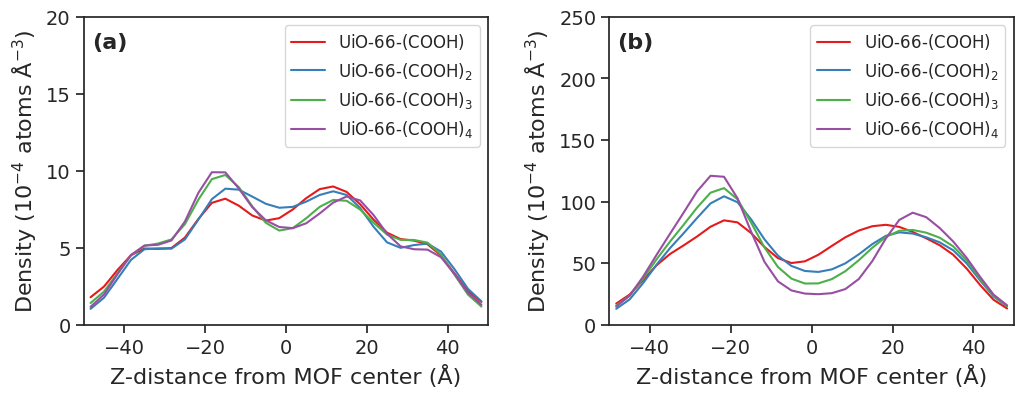

In [2]:
# =======================================================
# 2️⃣ Z-direction Density Profiles
# =======================================================
# Modified to use rectangular bins along the z-direction
# 📅 Date Updated: Oct 24, 2024
# - Radial bins replaced with z-direction bins
# - Density calculated along positive and negative z-directions
# - Axis labels and settings updated
# - Filename and save path updated

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import MDAnalysis as mda
import time
import datetime
from scipy.ndimage import gaussian_filter1d

# File paths relative to the current directory
file_paths = [
    'cd100/uio66-COO/dump_uio66-COO_system_md1_stride250.lammpstrj',
    'cd100/uio66-COO2/dump_uio66-COO2_system_md1_stride250.lammpstrj',
    'cd100/uio66-COO3/dump_uio66-COO3_system_md1_stride250.lammpstrj',
    'cd100/uio66-COO4/dump_uio66-COO4_system_md1_stride250.lammpstrj'
]

# Labels for the materials
labels = [r'UiO-66-$\mathrm{(COOH)}$', 
          r'UiO-66-$\mathrm{(COOH)}_2$', 
          r'UiO-66-$\mathrm{(COOH)}_3$', 
          r'UiO-66-$\mathrm{(COOH)}_4$']

# Set up seaborn styling
sns.set_theme(style="ticks", palette="colorblind")
# Set the color palette to 'Set2'
sns.set_palette('Set1')

# Parameters
num_bins = 30     # Number of z-direction bins
cutoff = 50.0     # Cutoff distance in angstroms (half the total z-range)
sigma = 2.0       # Sigma for Gaussian smoothing

# Variables to control subplot sizes
subplot_width = 6  # Width of each subplot in inches
subplot_height = 4  # Height of each subplot in inches
num_rows = 1
num_cols = 2

# Path where the PNG file will be saved
output_dir = '/home/josephzc/21Sept2024_data/0_fig/'  # Change this to your desired directory
filename = 'density_profiles_z_cd100.png'     # Filename for the saved figure
save_path = os.path.join(output_dir, filename)

# Function to process data and plot combined density profiles along z-direction
def plot_combined_density_profiles_z(file_paths, labels, save_path):
    num_files = len(file_paths)
    figsize = (subplot_width * num_cols, subplot_height * num_rows)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()

    # Initialize dictionaries to store densities
    densities_cd = {}
    densities_water = {}

    # Process each file
    for idx, file_path in enumerate(file_paths):
        start_time = time.time()
        print(f"Processing file {idx+1}/{len(file_paths)}: {file_path}")
        print(f"Start time: {datetime.datetime.now()}")

        # Check if the file exists
        if not os.path.isfile(file_path):
            print(f"File not found: {file_path}")
            continue

        try:
            # Determine expected Cd atom count based on folder name
            folder_name = os.path.basename(os.path.dirname(os.path.dirname(file_path)))
            if 'cd100' in folder_name.lower():
                expected_cd_count = 100
            elif 'cd50' in folder_name.lower():
                expected_cd_count = 50
            elif 'cd25' in folder_name.lower():
                expected_cd_count = 25
            else:
                print(f"Unknown folder '{folder_name}'. Unable to determine expected Cd atom count.")
                continue

            # Load the trajectory using MDAnalysis
            u = mda.Universe(file_path, format='LAMMPSDUMP')

            # Access the last frame
            u.trajectory[-1]

            # Get the atom types and count them
            types = u.atoms.types.astype(int)
            unique_types, counts = np.unique(types, return_counts=True)
            type_counts = dict(zip(unique_types, counts))

            # Determine atom types for water and Cd
            water_type = None
            cd_type = None

            for atom_type, count in type_counts.items():
                if count == 1000:
                    water_type = atom_type
                elif count == expected_cd_count:
                    cd_type = atom_type

            if water_type is None or cd_type is None:
                print(f"Could not determine atom types for water and Cd in file: {file_path}")
                continue

            # Select MOF atoms (all atoms except water and Cd)
            mof_atom_types = [atype for atype in unique_types if atype not in [water_type, cd_type]]
            mof_atoms = u.select_atoms('type ' + ' '.join(map(str, mof_atom_types)))

            if len(mof_atoms) == 0:
                print(f"No MOF atoms found in file: {file_path}")
                continue

            # Calculate the center of mass of the MOF
            mof_center = mof_atoms.center_of_mass()

            # Get box dimensions
            box_dimensions = u.dimensions
            lx, ly, lz, alpha, beta, gamma = box_dimensions
            area = lx * ly  # Cross-sectional area in x-y plane

            # Select Cd atoms
            cd_atoms = u.select_atoms(f"type {cd_type}")
            if len(cd_atoms) == 0:
                print(f"No Cd atoms (type {cd_type}) found in file: {file_path}")
                continue

            # Select water atoms
            water_atoms = u.select_atoms(f"type {water_type}")
            if len(water_atoms) == 0:
                print(f"No water atoms (type {water_type}) found in file: {file_path}")
                continue

            # Function to calculate density profile along z
            def calculate_density_z(atom_group, center_z, bins, area):
                positions_z = atom_group.positions[:, 2]  # z-coordinates
                z_distances = positions_z - center_z
                counts, _ = np.histogram(z_distances, bins=bins)
                bin_widths = bins[1:] - bins[:-1]  # thickness of each slab
                volumes = area * bin_widths  # volume of each slab
                densities = counts / volumes  # atoms per cubic angstrom
                return densities

            # Create z-distance bins
            bins = np.linspace(-cutoff, cutoff, num_bins + 1)
            bin_centers = 0.5 * (bins[:-1] + bins[1:])

            # Calculate densities for Cd atoms
            density_cd = calculate_density_z(cd_atoms, mof_center[2], bins, area)
            if sigma > 0:
                density_cd = gaussian_filter1d(density_cd, sigma=sigma)
            # Multiply densities by 10^4
            density_cd *= 1e4
            densities_cd[labels[idx]] = density_cd

            # Calculate densities for water atoms
            density_water = calculate_density_z(water_atoms, mof_center[2], bins, area)
            if sigma > 0:
                density_water = gaussian_filter1d(density_water, sigma=sigma)
            # Multiply densities by 10^4
            density_water *= 1e4
            densities_water[labels[idx]] = density_water

            end_time = time.time()
            elapsed_time = end_time - start_time
            print(f"Finished processing {file_path}")
            print(f"End time: {datetime.datetime.now()}")
            print(f"Elapsed time: {elapsed_time:.2f} seconds\n")

        except Exception as e:
            print(f"An error occurred while processing {file_path}: {e}")
            continue

    # Axis settings dictionaries for Z-direction plot
    x_settings_cd = {
        'x_min': -cutoff,
        'x_max': cutoff,
        'xticks': [-40, -20, 0, 20, 40],
        'xlabel': 'Z-distance from MOF center (Å)',
        'labelpad': 5
    }

    y_settings_cd = {
        'y_min': 0,
        'y_max': 20,
        'yticks': [0, 5, 10, 15,20],
        'ylabel': 'Density ($10^{-4}$ atoms Å$^{-3}$)',
        'labelpad': 5
    }

    x_settings_water = {
        'x_min': -cutoff,
        'x_max': cutoff,
        'xticks': [-40, -20, 0, 20, 40],
        'xlabel': 'Z-distance from MOF center (Å)',
        'labelpad': 5
    }

    y_settings_water = {
        'y_min': 0,
        'y_max': 250,
        'yticks': [0, 50, 100, 150, 200, 250],
        'ylabel': 'Density ($10^{-4}$ atoms Å$^{-3}$)',
        'labelpad': 5
    }


    # Plotting Cd densities
    ax_cd = axes[0]
    for label in labels:
        density_cd = densities_cd.get(label)
        if density_cd is not None:
            ax_cd.plot(bin_centers, density_cd, label=label)
    ax_cd.set_xlim(x_settings_cd['x_min'], x_settings_cd['x_max'])
    ax_cd.set_ylim(y_settings_cd['y_min'], y_settings_cd['y_max'])
    ax_cd.set_xticks(x_settings_cd['xticks'])
    ax_cd.set_yticks(y_settings_cd['yticks'])
    ax_cd.set_xlabel(x_settings_cd['xlabel'], fontsize=16, labelpad=x_settings_cd.get('labelpad', 5))
    ax_cd.set_ylabel(y_settings_cd['ylabel'], fontsize=16, labelpad=y_settings_cd.get('labelpad', 5))
    ax_cd.tick_params(axis='both', which='major', labelsize=14)
    ax_cd.legend(fontsize=12, loc='upper right')
    ax_cd.text(0.02, 0.95, '(a)', transform=ax_cd.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

    # Plotting water densities
    ax_water = axes[1]
    for label in labels:
        density_water = densities_water.get(label)
        if density_water is not None:
            ax_water.plot(bin_centers, density_water, label=label)
    ax_water.set_xlim(x_settings_water['x_min'], x_settings_water['x_max'])
    ax_water.set_ylim(y_settings_water['y_min'], y_settings_water['y_max'])
    ax_water.set_xticks(x_settings_water['xticks'])
    ax_water.set_yticks(y_settings_water['yticks'])
    ax_water.set_xlabel(x_settings_water['xlabel'], fontsize=16, labelpad=x_settings_water.get('labelpad', 5))
    ax_water.set_ylabel(y_settings_water['ylabel'], fontsize=16, labelpad=y_settings_water.get('labelpad', 5))
    ax_water.tick_params(axis='both', which='major', labelsize=14)
    ax_water.legend(fontsize=12, loc='upper right')
    ax_water.text(0.02, 0.95, '(b)', transform=ax_water.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

    # Adjust layout and display the plot
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    # plt.suptitle('Combined Density Profiles along Z', fontsize=18, y=0.98)

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Save the figure as PNG
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Figure saved to {save_path}\n")
    plt.show()

# Call the function to plot and save combined density profiles along z-direction
plot_combined_density_profiles_z(file_paths, labels, save_path)
